\# แบบฝึกหัด การทำ Data Classification  ให้เติมส่วนของโปรแกรมต่อไปนี้ให้สมบูรณ์
โดย ....................

ทำการเชื่อม Google Drive

In [10]:
# from google.colab import drive

# drive.mount('/content/gdrive')

ระบุ Folder ใน Drive ที่ต้องการใช้

In [11]:
import os
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/204102/Lab_3")
os.chdir("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset")


อ่านข้อมูลจากไฟล์

In [12]:
# Load libraries
import pandas as pd

dataset = pd.read_csv("zoo.csv")
dataset.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


แบ่งข้อมูลเป็น Features และ Class  โดย
X คือข้อมูลในคอลัมน์ hair เป็นต้นไปถึง catsize
y คือ ข้อมูลในคอลัมน์ type

In [13]:
rows,cols = dataset.shape
print(rows,cols)
X = dataset.iloc[:, 1:cols-1].values
y = dataset.iloc[:, cols-1].values

101 18


In [14]:
print(X)

[[True False False ... False False True]
 [True False False ... True False True]
 [False False True ... True False False]
 ...
 [True False False ... True False True]
 [False False True ... False False False]
 [False True True ... True False False]]


ทำการแบ่ง Training set และ Testing set
ให้ระบุ training set มีขนาด 75% และ test set มีขนาด 25%

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

สร้างโมเดลการจำแนกข้อมูล โดยทำการทดสอบกับ Classification หลายๆ รูปแบบ

#สร้างโมเดลการจำแนกข้อมูล โดยทำการทดสอบกับ Classification หลายๆ รูปแบบ


ทำการนำเข้า Libaries สำหรับการจำแนกแบบอื่น

In [16]:
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.tree        import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics     import classification_report

ทำการสร้างและทดสอบโมเดลด้วย classifier algorithms อื่น

KNN-5: 0.807692 
KNN-7: 0.807692 
Tree: 1.000000 
Naive Bayes: 0.961538 


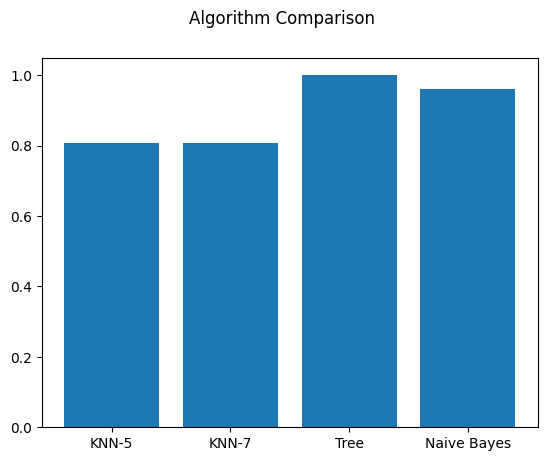

In [17]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
models = []
models.append(('KNN-5', KNeighborsClassifier()))
models.append(('KNN-7', KNeighborsClassifier(n_neighbors= 7)))  # KNN with 7 Neighbors
models.append(('Tree', DecisionTreeClassifier()))
models.append(("Naive Bayes", GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, clf in models:
  model = clf
  model.fit(X_train,y_train)
  Predited_class = model.predict(X_test)
  accuracy=accuracy_score(y_test, Predited_class)
  results.append(accuracy)
  names.append(name)
  msg = "%s: %f " % (name, accuracy)
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results)

plt.show()

เลือกโมเดลที่ให้ผลลัพธ์ดีที่สุด

In [18]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

สร้าง Form เพื่อรับข้อมูลสำหรับการทดสอบการทำงาน

In [19]:
#@title Default title text
hair = True       #@param {type:"boolean"}
feathers = False  #@param {type:"boolean"}
eggs = True      #@param {type:"boolean"}
milk = False       #@param {type:"boolean"}
airborne = True   #@param {type:"boolean"}
aquatic = False   #@param {type:"boolean"}
predator = True  #@param {type:"boolean"}
toothed = False    #@param {type:"boolean"}
backbone = True   #@param {type:"boolean"}
breathes = True   #@param {type:"boolean"}
venomous = False  #@param {type:"boolean"}
fins = False      #@param {type:"boolean"}
legs = 2          #@param {type:"integer"}
tail = False      #@param {type:"boolean"}
domestic = False  #@param {type:"boolean"}
catsize = False   #@param {type:"boolean"}



In [20]:
TestingData = [[hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]]
# print(len(TestingData[0]))
prediction = model.predict(TestingData)
print(prediction)

['mammal']
